<h4 align="right">17th of February 2020</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 4: Deep feedforward network</h2> <br>

In this lab, we will focus on the concepts of deep feedforward network through classification and regression examples. We will demonstrate the construction of the network, the choice of cost functions, the choice of output unit activation functions, the choice of hidden units, and the way we monitor the performance of the network.

- We will use tensorflow 2 for building our model and monitoring its performance using tensorboard notebook extension. 

First, check the version of tensorflow currently installed in your notebook. 

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


Uninstall tensorflow 1 and then, install the new tensorflow 2

In [4]:
!pip uninstall -q tensorboard tb-nightly
!pip install -q tf-nightly-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


Now, restart runtime in order for the new installed tensorflow to be loaded.

Make sure that this code block prints '2.0.0-dev20191002'

In [3]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import datetime, os
# Load the TensorBoard notebook extension
%load_ext tensorboard
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

#**1. Choosing the appropriate loss function**

Reference: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

Neural network models learn a mapping from inputs to outputs from examples and the choice of loss function must match the framing of the specific predictive modeling problem, such as classification or regression. Further, the configuration of the output layer must also be appropriate for the chosen loss function.

Regression Loss Functions
- Mean Squared Error Loss
- Mean Squared Logarithmic Error Loss
- Mean Absolute Error Loss

Binary Classification Loss Functions
- Binary Cross-Entropy
- Hinge Loss

Multi-Class Classification Loss Functions
- Multi-Class Cross-Entropy Loss
- Sparse Multiclass Cross-Entropy Loss
- Kullback Leibler Divergence Loss

In [0]:
print(history.history.keys())

NameError: ignored

## **1.1 Regression**

We will use make_regression() function to define a problem that has 20 input features. A total of 1,000 examples will be randomly generated. The pseudorandom number generator will be fixed to ensure that we get the same 1,000 examples each time the code is run.

**1.1.1 Mean Squared Error**

The Mean Squared Error, or MSE, loss is the default loss to use for regression problems.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.


In [0]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0] #why is [:,0]


# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**1.1.2 Mean Squared Logarithmic Error**

There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.

Instead, you can first calculate the natural logarithm of each of the predicted values, then calculate the mean squared error. This is called the Mean Squared Logarithmic Error loss, or MSLE for short.

As a loss measure, it may be more appropriate when the model is predicting unscaled quantities directly.

In [0]:
# mlp for regression with msle loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

we can see that the model resulted in slightly worse MSE on both the training and test dataset. It may not be a good fit for this problem as the distribution of the target variable is a standard Gaussian.

**1.1.3 Mean Absolute Error**

On some regression problems, the distribution of the target variable may be mostly Gaussian, but may have outliers, e.g. large or small values far from the mean value.

The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values.

In [0]:
# mlp for regression with mae loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

In this case, we can see that MAE does converge but shows a bumpy course, although the dynamics of MSE don’t appear greatly affected. We know that the target variable is a standard Gaussian with no large outliers, so MAE would not be a good fit in this case.

It might be more appropriate on this problem if we did not scale the target variable first.

## **1.2 Binary Classification**

In [0]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

1.2.1 Binary Cross-Entropy Loss


Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

The function requires the output layer is configured with a single node and a ‘sigmoid‘ activation in order to predict the probability for class 1.

In [0]:
# mlp for the circles problem with cross entropy loss
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

**1.2.2 Hinge Loss**

An alternative to cross-entropy for binary classification problems, primarily developed for use with Support Vector Machine (SVM) models.

It is intended for use with binary classification where the target values are in the set {-1, 1}. The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values.

In [0]:
# mlp for the circles problem with hinge loss
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In this case, we can see slightly worse performance than using cross-entropy, with the chosen model configuration with less than 80% accuracy on the train and test sets.

##**1.3 Multi-class Classification**

The problem is often framed as predicting an integer value, where each class is assigned a unique integer value from 0 to (num_classes – 1). The problem is often implemented as predicting the probability of the example belonging to each known class.

In [0]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from numpy import where
from matplotlib import pyplot
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label
for i in range(3):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

**1.3.1 Multi-Class Cross-Entropy Loss**

Cross-entropy is the default loss function to use for multi-class classification problems. Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

The function requires that the output layer is configured with an n nodes (one for each class), in this case three nodes, and a ‘softmax‘ activation in order to predict the probability for each class.

In [0]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In this case, the plot shows the model seems to have converged. The line plots for both cross-entropy and accuracy both show good convergence behavior, although somewhat bumpy. The model may be well configured given no sign of over or under fitting. The learning rate or batch size may be tuned to even out the smoothness of the convergence in this case.

**1.3.2 Sparse Multiclass Cross-Entropy Loss**

A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.

For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training.

The function requires that the output layer is configured with an n nodes (one for each class), in this case three nodes, and a ‘softmax‘ activation in order to predict the probability for each class.

In [0]:
# mlp for the blobs multi-class classification problem with sparse cross-entropy loss
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Sigmoid

In [0]:
from tensorflow.keras import layers
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(150, activation =tf.nn.sigmoid)(inp)
# x = layers.Dense(500, activation =tf.nn.sigmoid)(x)
out = layers.Dense(10, activation=tf.nn.softmax)(x)
model = keras.Model(inp,out)

In [0]:
model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])

epochs = 10
history1 = model.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
score = model.evaluate(xtest, ytest, verbose=100)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


**Problems With Sigmoid Function** :<br>
*The exp( ) in sigmoid function is computationally expensive.<br>
*Outputs not zero centered <br>
*The problem of vanishing gradients: <br>

Gradients tend to get smaller and smaller as we keep on moving backward which implies that neurons in earlier layers learn very slowly compared to neurons in the last layers

#**2. Choosing activation functions**

### data loading 

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist.load_data()

In [0]:
train, test = mnist
xtrain, Ytrain = train
xtest, Ytest = test
xtrain = xtrain.reshape(-1,28*28) / 255
xtest = xtest.reshape(-1,28*28) / 255

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False,categories='auto')
ytrain = enc.fit_transform(Ytrain.reshape(-1, 1))
ytest = enc.transform(Ytest.reshape(-1, 1))

In [0]:
xtrain.shape

## Without Activation

In [0]:
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(150, activation = None)(inp)
out = layers.Dense(10, activation=tf.nn.softmax)(x)
model = keras.Model(inp,out)
model.summary()

In [0]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])

In [0]:
epochs = 10
history = model.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
score = model.evaluate(xtest, ytest, verbose=100)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


92% accuracy on MNIST dataset is pretty bad.<br>
You may say that we need much more than 10 epochs, but as seen in losses plot the validation loss is not improving.
<br>
       WHY !!! 

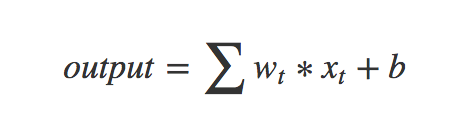
<br>
You can see that NN is just a linear combination of the input with the weights and the bias. Even if we have many layers, we will still be able to represent them as a single linear equation. That means, that it’s similar to a network without hidden layers at all.

## Using Activation

if we add non linear function, we can’t represent it as a linear combination of our input. That’s what brings non linearity to our network and ables it to learn non linear relationships.

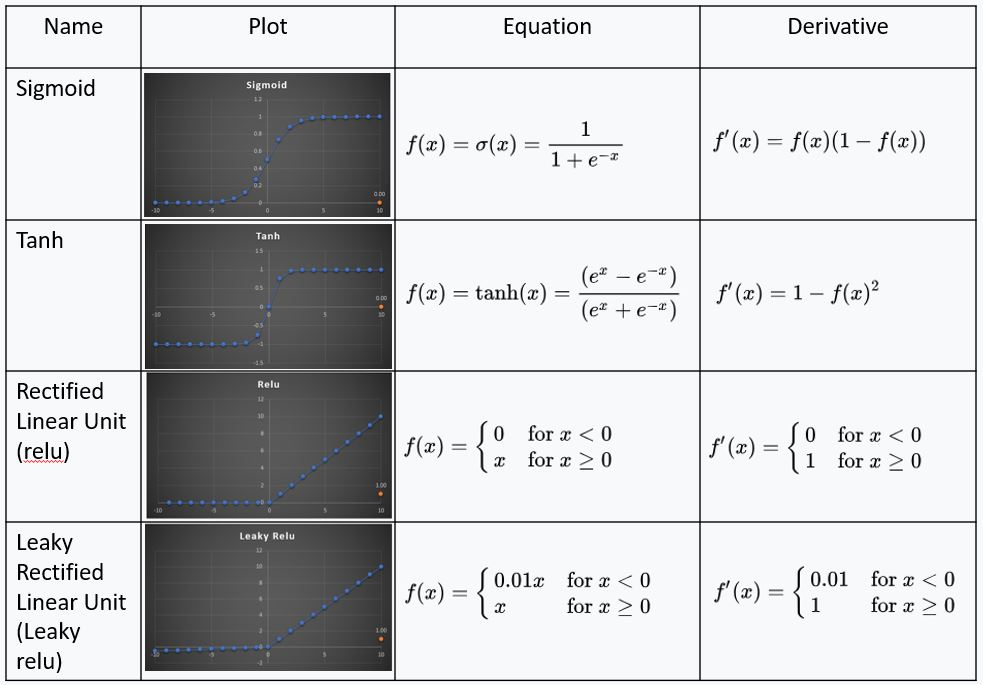
source:https://engmrk.com/activation-function-for-dnn/

##tanh

it's like sigmoid but:<br>
*gradient is stronger (steeper) for tanh than sigmoid <br>
*it's zero centered <br>
but still suffers from vanishing gradients problem

**Usually we use tanh instead of sigmoid in most cases** 


In [0]:
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(150, activation =tf.nn.tanh)(inp)
out = layers.Dense(10, activation=tf.nn.softmax)(x)
model = keras.Model(inp,out)

In [0]:
model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])

epochs = 10
history2 = model.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
score = model.evaluate(xtest, ytest, verbose=100)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


## Relu

Advantages: <br>
*Computationally efficient(Cheap)<br>
*Not have vanishing gradient problem (converges faster)<br>
*Representational Sparsity (almost 50% of the network yields 0 activation. This means a fewer neurons are firing and the network is lighter.<br><br>
problem:<br>
The Dying ReLU problem—when inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.


In [0]:
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(150, activation =tf.nn.relu)(inp)
out = layers.Dense(10, activation=tf.nn.softmax)(x)
model = keras.Model(inp,out)

In [0]:
model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['acc'])

epochs = 10
history3 = model.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
score = model.evaluate(xtest, ytest, verbose=100)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


## comparison

In [0]:
plt.plot(history.history['val_acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['val_acc'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')


## Best Practices
* Use ReLU in hidden layer activation, but be careful with the learning rate.<br>
* If ReLU is giving problems. Try Leaky ReLU, PReLU, Maxout. <br>
* Do not use sigmoid <br>
* Normalize the data in order to achieve higher validation accuracy, and standardize if you need the results faster. <br>
* The sigmoid and hyperbolic tangent activation functions cannot be used in networks with many layers due to the vanishing gradient problem.



#**3.Configure the Number of Layers and Nodes**

Reference: https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/

Before we look at how many layers to specify, it is important to think about why we would want to have multiple layers.

A single-layer neural network can only be used to represent linearly separable functions. This means very simple problems where, say, the two classes in a classification problem can be neatly separated by a line. If your problem is relatively simple, perhaps a single layer network would be sufficient.

Most problems that we are interested in solving are not linearly separable.

A Multilayer Perceptron can be used to represent convex regions. This means that in effect, they can learn to draw shapes around examples in some high-dimensional space that can separate and classify them, overcoming the limitation of linear separability.


For those functions that can be learned via a sufficiently large one-hidden-layer MLP, it can be more efficient to learn it with two (or more) hidden layers.

**How Many Layers and Nodes to Use?**

- Experimentation
- Intuition
- Go For Depth
- Borrow Ideas
- Search


#**Exercise**

### classification

In [0]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

Load the MNIST dataset. It is a dataset that contains gray images of handwritten digits from 0 to 9. The size of each image is 28x28 pixels, and the pixel values range from 0 to 255. 

The goal is to train a network to classify these images to their correct label (10 classes). 

![alt text](https://miro.medium.com/max/1100/1*XdCMCaHPt-pqtEibUfAnNw.png)

In [0]:
mnist = tf.keras.datasets.mnist.load_data()

Each image in the dataset has the shape of (28,28). We flatten the images to an array of the shape (28*28,) to be 1D in order for them to enter our network. 

In the case of using CNN, the input images can enter the nework in 2D shape (28,28) without the need to be flattened. That's because CNN is composed of filters that can accept 2D or 3D images. (We will get to this when we study CNN)

We rescale the images to (0-1) range by dividing them by 255. 

In [0]:
train, test = mnist
xtrain, Ytrain = train
xtest, Ytest = test
xtrain = xtrain.reshape(-1,28*28) / 255
xtest = xtest.reshape(-1,28*28) / 255

One-hot encoding the labels

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False,categories='auto')
ytrain = enc.fit_transform(Ytrain.reshape(-1, 1))
ytest = enc.transform(Ytest.reshape(-1, 1))

In [0]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

In [0]:
####### TO BE DONE ######### grade: 40% 
#Define your keras model here with the appropriate number of layers, nodes, and activation functions that give the best results. 
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(150, activation =tf.nn.tanh)(inp)
x = layers.Dense(50, activation =tf.nn.relu)(x)
out = layers.Dense(10, activation=tf.nn.softmax)(x)
model = keras.Model(inp,out)

#######################################

In [0]:
tf.keras.backend.clear_session()  ## Destroys the current TF graph and creates a new one.
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
####### TO BE DONE ######### grade: 10% 
#Choose the appropriate loss function for this problem

#######################################


In [0]:
model.summary()

In [0]:
  # couldn't run on the sparse cateogrical cross entropy
  epochs = 50
  # training the model
  history = model.fit(xtrain[:5000], ytrain[:5000], batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True, callbacks=[tensorboard_callback])

In [0]:
# evaluate the model
train_acc = model.evaluate(xtrain[:5000], ytrain[:5000], verbose=0)[1]
test_acc = model.evaluate(xtest[:1000], ytest[:1000], verbose=0)[1]
print('Train_accuracy: %.2f, Test_accuracy: %.2f' % (train_acc, test_acc))
# couldn't get test accuracy more than 0.93

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.legend()
  

In [0]:
plot_history(history)

### Regression

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [0]:
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

Use California housing dataset. It has 8 features: 
- 'MedInc' median income in block

- 'HouseAge' median house age in block

- 'AveRooms' average number of rooms

- 'AveBedrms' average number of bedrooms

- 'Population' block population

- 'AveOccup' average house occupancy

- 'Latitude' house block latitude

- 'Longitude' house block longitude

The target variable is the median house value for California districts (real      0.15 - 5.).

In [0]:
dataset = fetch_california_housing()

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

In [0]:
####### TO BE DONE ######### grade: 40% 
#Define your keras model here with the appropriate number of layers, nodes, and activation functions that give the best results. 
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(100, activation =tf.nn.relu)(inp)
out = layers.Dense(1, activation=None)(x)
model = keras.Model(inp,out)



#######################################

In [0]:
model.summary()

In [0]:
tf.keras.backend.clear_session()  ## Destroys the current TF graph and creates a new one.
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
optimizer = keras.optimizers.Adam(lr=0.001)
####### TO BE DONE ######### grade: 10% 
#Choose the appropriate loss function for this problem
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'], callbacks=[tensorboard_callback])
##########################################

In [0]:
epochs = 100
history = model.fit(xtrain, ytrain, batch_size=512, epochs = epochs, validation_split = 0.2, callbacks=[tensorboard_callback])

In [0]:
# evaluate the model
train_loss = model.evaluate(xtrain, ytrain, verbose=0)[0]
test_loss = model.evaluate(xtest, ytest, verbose=0)[0]
print('Train: %.3f, Test: %.3f' % (train_loss, test_loss))

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
#   plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
#   plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)